In [20]:
#import libraries and xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [21]:
#retrieve data
df=pd.read_csv("/kaggle/input/nsei-prev-data/in_nsei_daily.csv",index_col='minute', parse_dates=True)
df.index = df.index.to_pydatetime()
df.head()

,ticker,instrument_token,open,high,low,close
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85


In [22]:
df = pd.DataFrame(df)
df

,ticker,instrument_token,open,high,low,close
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85
...,...,...,...,...,...,...
2022-12-26 09:15:00+05:30,NSEI,uf-n-1647516806122,17832.90,18084.10,17774.25,18010.30
2022-12-27 09:15:00+05:30,NSEI,uf-n-1647516806122,18081.90,18149.25,17967.45,18136.00
2022-12-28 09:15:00+05:30,NSEI,uf-n-1647516806122,18093.00,18173.10,18068.35,18109.25
2022-12-29 09:15:00+05:30,NSEI,uf-n-1647516806122,18059.80,18229.70,17992.80,18207.10


<AxesSubplot:>

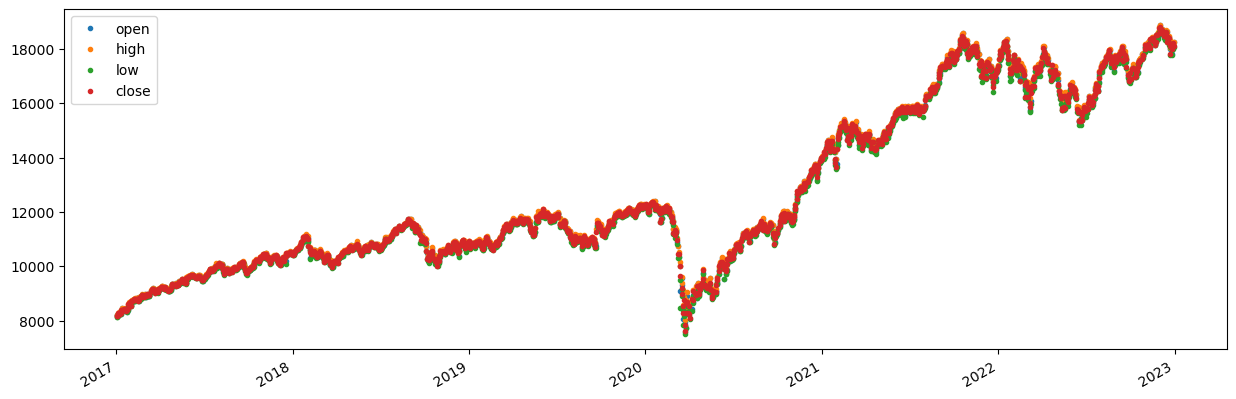

In [23]:
#plot data
df.plot(style='.',figsize=(15,5))

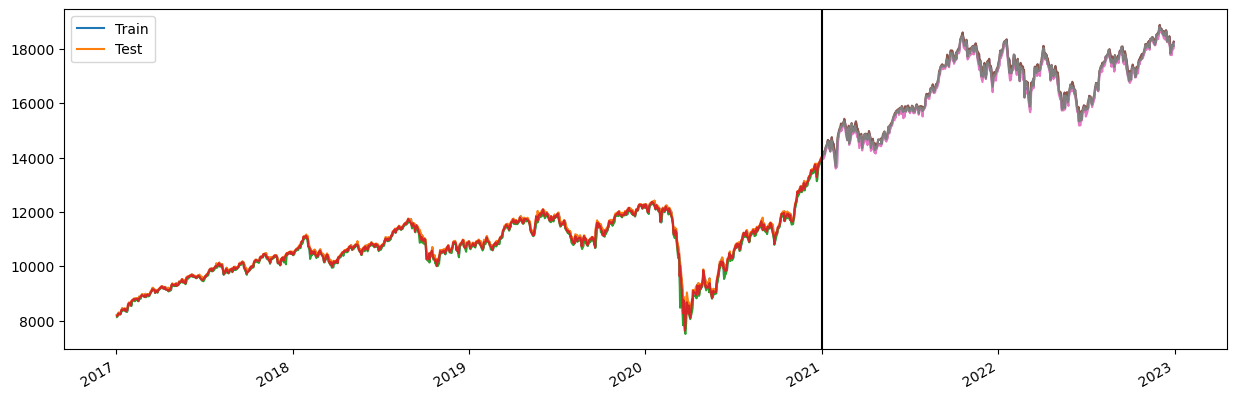

In [24]:
#train/test split
train=df.loc[df.index<'01-01-2021']
test=df.loc[df.index>='01-01-2021']

fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Training Set')
test.plot(ax=ax,label='Test Set')
ax.axvline('01-01-2021',color='black')
ax.legend(['Train','Test'])
plt.show()

In [25]:
df.loc[(df.index>'01-01-2021')&(df.index<'01-08-2021')]

,ticker,instrument_token,open,high,low,close
2021-01-01 09:15:00+05:30,NSEI,uf-n-1647516806122,13997.90,14049.85,13991.35,14015.10
2021-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,14105.55,14147.95,13953.75,14144.50
2021-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,14078.05,14215.60,14048.15,14196.35
2021-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,14244.15,14244.15,14039.90,14132.80
2021-01-07 09:15:00+05:30,NSEI,uf-n-1647516806122,14256.25,14256.25,14123.10,14148.50


In [26]:
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

In [27]:
#feature extraction
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

train['month'] = train.index.month
train['year'] = train.index.year
train['day_of_year'] = train.index.dayofyear

test['month'] = test.index.month
test['year'] = test.index.year
test['day_of_year'] = test.index.dayofyear

In [28]:
train.head

<bound method NDFrame.head of                           ticker    instrument_token      open      high  \
2017-01-02 09:15:00+05:30   NSEI  uf-n-1647516806122   8211.70   8211.70   
2017-01-03 09:15:00+05:30   NSEI  uf-n-1647516806122   8195.25   8219.00   
2017-01-04 09:15:00+05:30   NSEI  uf-n-1647516806122   8201.60   8218.45   
2017-01-05 09:15:00+05:30   NSEI  uf-n-1647516806122   8227.75   8282.55   
2017-01-06 09:15:00+05:30   NSEI  uf-n-1647516806122   8283.50   8306.50   
...                          ...                 ...       ...       ...   
2020-12-24 09:15:00+05:30   NSEI  uf-n-1647516806122  13643.95  13771.75   
2020-12-28 09:15:00+05:30   NSEI  uf-n-1647516806122  13824.40  13885.30   
2020-12-29 09:15:00+05:30   NSEI  uf-n-1647516806122  13915.50  13967.60   
2020-12-30 09:15:00+05:30   NSEI  uf-n-1647516806122  13982.90  13997.00   
2020-12-31 09:15:00+05:30   NSEI  uf-n-1647516806122  13978.25  14024.85   

                                low     close  month  yea

<AxesSubplot:xlabel='month', ylabel='close'>

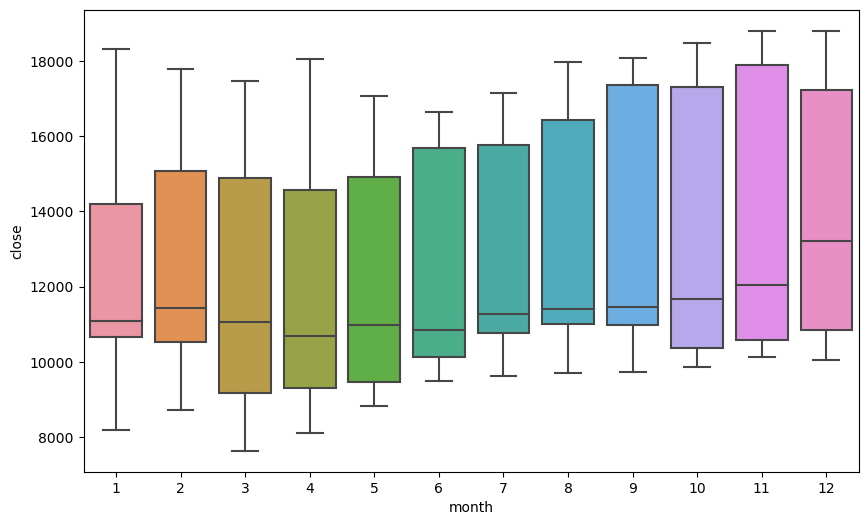

In [29]:
#visualize feature vs target
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=df,x='month',y='close')

<AxesSubplot:xlabel='year', ylabel='close'>

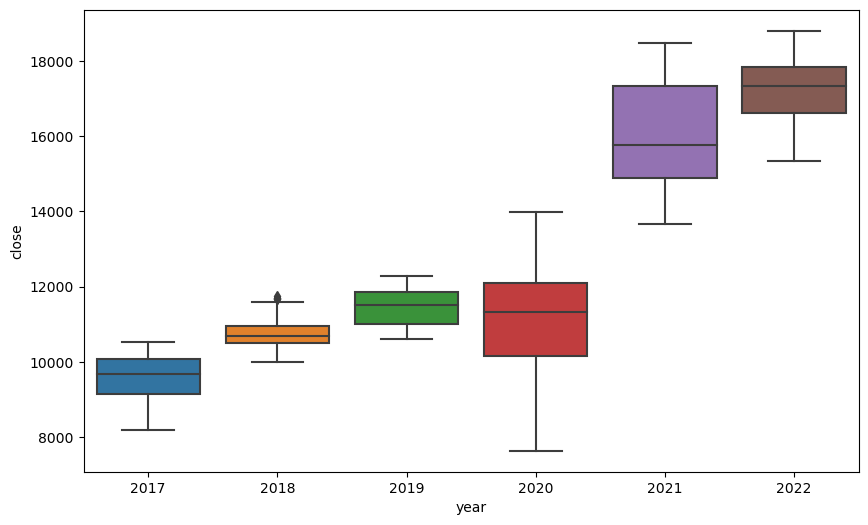

In [30]:
#visualize feature vs target
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=df,x='year',y='close')

In [31]:
train.columns

Index(['ticker', 'instrument_token', 'open', 'high', 'low', 'close', 'month',
       'year', 'day_of_year'],
      dtype='object')

In [32]:
#store features
features=['month', 'year', 'day_of_year']
target='close'

In [33]:
#x and y data for feature and target
x=df[features]
y=df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
#create model
from sklearn.metrics import mean_squared_error

reg=xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
reg.fit(x_train, y_train, eval_set=[(x_train, y_train),(x_test,y_test)],verbose=True)

[0]	validation_0-rmse:9127.30233	validation_1-rmse:9302.12189
[1]	validation_0-rmse:6429.70158	validation_1-rmse:6558.37431
[2]	validation_0-rmse:4540.62557	validation_1-rmse:4638.85170
[3]	validation_0-rmse:3211.39423	validation_1-rmse:3280.74431
[4]	validation_0-rmse:2278.12306	validation_1-rmse:2327.65914
[5]	validation_0-rmse:1624.23509	validation_1-rmse:1662.18642
[6]	validation_0-rmse:1164.62556	validation_1-rmse:1193.77721
[7]	validation_0-rmse:848.06255	validation_1-rmse:875.66550
[8]	validation_0-rmse:625.30429	validation_1-rmse:651.98551
[9]	validation_0-rmse:467.19879	validation_1-rmse:499.28809
[10]	validation_0-rmse:361.97178	validation_1-rmse:398.32791
[11]	validation_0-rmse:292.19231	validation_1-rmse:335.14819
[12]	validation_0-rmse:242.13966	validation_1-rmse:289.65872
[13]	validation_0-rmse:212.26883	validation_1-rmse:264.74191
[14]	validation_0-rmse:193.18070	validation_1-rmse:246.57384
[15]	validation_0-rmse:173.18452	validation_1-rmse:226.57262
[16]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [35]:
#feature importance
reg.feature_importances_

array([0.07405607, 0.8956309 , 0.03031304], dtype=float32)

<AxesSubplot:>

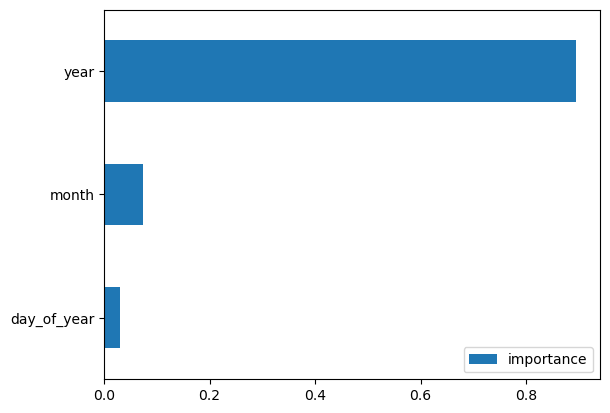

In [36]:
fi=pd.DataFrame(data=reg.feature_importances_,index=reg.feature_names_in_,columns=['importance'])
fi.sort_values('importance').plot(kind='barh')

In [37]:
#forecast data
test['prediction']=reg.predict(test[features])
df=df.merge(test[['prediction']],how='left',left_index=True,right_index=True)

<AxesSubplot:>

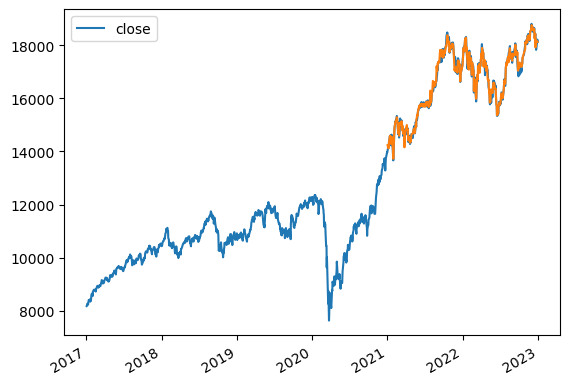

In [38]:
#plot predictions- model isn't good
df[['close']].plot()
df['prediction'].plot()

In [39]:
#RMSE Score
np.sqrt(mean_squared_error(test['close'],test['prediction']))

120.4504893543952

In [40]:
#store new features
features=['open', 'high', 'low']
target='close'

In [41]:
#x and y data for feature and target
x=df[features]
y=df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [42]:
reg=xgb.XGBRegressor(n_estimators=100, early_stopping_rounds=50)
reg.fit(x_train, y_train, eval_set=[(x_train, y_train),(x_test,y_test)],verbose=True)

[0]	validation_0-rmse:9115.93312	validation_1-rmse:9269.78223
[1]	validation_0-rmse:6402.28110	validation_1-rmse:6512.12065
[2]	validation_0-rmse:4497.33095	validation_1-rmse:4575.21706
[3]	validation_0-rmse:3161.18177	validation_1-rmse:3217.92267
[4]	validation_0-rmse:2223.17954	validation_1-rmse:2268.98459
[5]	validation_0-rmse:1564.76620	validation_1-rmse:1598.84198
[6]	validation_0-rmse:1103.02794	validation_1-rmse:1126.71294
[7]	validation_0-rmse:779.59772	validation_1-rmse:797.01540
[8]	validation_0-rmse:552.95803	validation_1-rmse:563.79519
[9]	validation_0-rmse:395.43495	validation_1-rmse:403.93298
[10]	validation_0-rmse:285.26014	validation_1-rmse:291.60570
[11]	validation_0-rmse:207.21187	validation_1-rmse:212.87267
[12]	validation_0-rmse:153.41200	validation_1-rmse:161.22948
[13]	validation_0-rmse:117.33722	validation_1-rmse:129.00480
[14]	validation_0-rmse:92.90277	validation_1-rmse:107.79100
[15]	validation_0-rmse:75.96107	validation_1-rmse:96.07749
[16]	validation_0-rmse:

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [43]:
df['predicted']=reg.predict(df[features])

<AxesSubplot:>

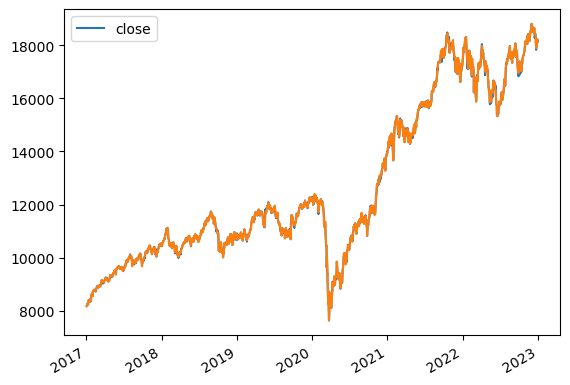

In [44]:
#plot predictions- model isn't good
df[['close']].plot()
df['predicted'].plot()

In [45]:
#RMSE Score
np.sqrt(mean_squared_error(df['close'],df['predicted']))

40.79539276523519